In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
seperated_population = gpd.read_file(r'./행정동별 인구(노드 분할).shp')

<AxesSubplot:>

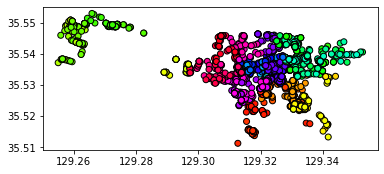

In [3]:
seperated_population.plot(cmap='hsv',edgecolor='black',column = 'number')

In [4]:
seperated_population

,number,aver_price,lat,long,demand,region,geometry
0,0,6.032117e+05,35.525371,129.317114,15,수암동,POINT (129.31711 35.52537)
1,1,7.715162e+05,35.521118,129.321041,12,수암동,POINT (129.32104 35.52112)
2,2,8.084966e+05,35.524419,129.317167,10,수암동,POINT (129.31717 35.52442)
3,3,9.147863e+05,35.521613,129.317801,13,수암동,POINT (129.31780 35.52161)
4,4,1.009718e+06,35.523044,129.315964,9,수암동,POINT (129.31596 35.52304)
...,...,...,...,...,...,...,...
1913,1366,1.255054e+06,35.545796,129.307289,10,신정1동,POINT (129.30729 35.54580)
1914,1366,1.255054e+06,35.545796,129.307289,10,신정1동,POINT (129.30729 35.54580)
1915,1366,1.255054e+06,35.545796,129.307289,10,신정1동,POINT (129.30729 35.54580)
1916,1378,1.560868e+06,35.542452,129.306611,10,신정1동,POINT (129.30661 35.54245)


In [8]:
aoi = gpd.read_file(r'./geo_tutorial_data/area_of_interest.shp')
districts = gpd.read_file(r'./geo_tutorial_data/districts.shp')
atms= gpd.read_file(r'./geo_tutorial_data/atms.shp')
railway_tracks =  gpd.read_file(r'./geo_tutorial_data/railway_tracks.shp')

<AxesSubplot:>

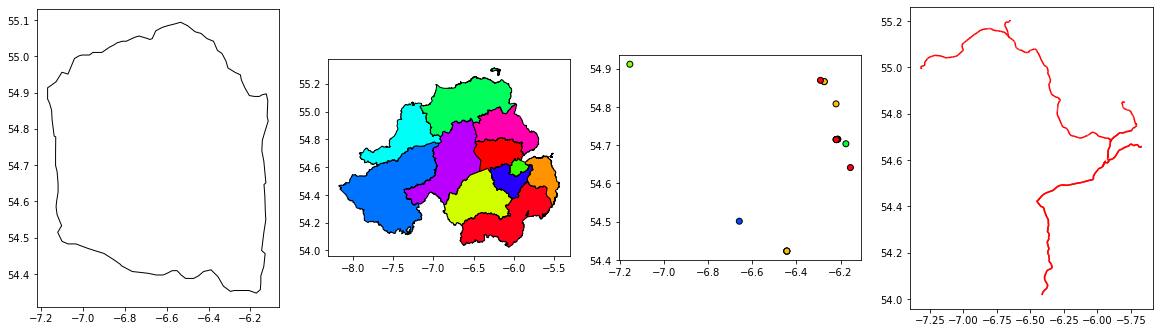

In [27]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(20,12))  

aoi.plot(ax=ax1,color='None',edgecolor='black')
districts.plot(ax=ax2,cmap='hsv',edgecolor='black',column = 'district')
atms.plot(ax=ax3,cmap='hsv',edgecolor='black',column = 'operator')
railway_tracks.plot(ax=ax4,edgecolor='red')

<AxesSubplot:>

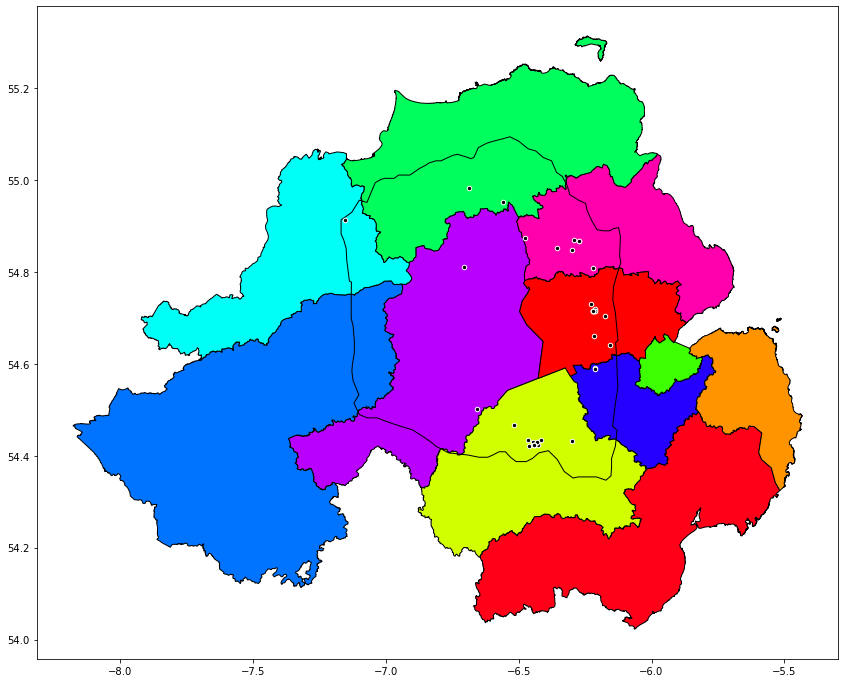

In [40]:
fig, ax = plt.subplots(figsize=(20,12))  
districts.plot(ax=ax,cmap='hsv',edgecolor='black',column = 'district')
aoi.plot(ax=ax,color='None',edgecolor='black')
atms.plot(ax=ax,color='black',edgecolor='white',markersize=20)

<AxesSubplot:>

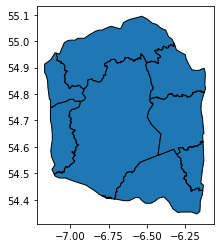

In [57]:
districts_in_api = gpd.overlay(districts,aoi,how='intersection')
districts_in_api.plot(edgecolor='black')

In [59]:
districts_in_api['area'] = districts_in_api.area

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11128/483915868.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts_in_api['area'] = districts_in_api.area


In [63]:
districts_in_api['area']
#districts_in_api.to_file('districts_in_api.shp)

0    0.219289
1    0.052293
2    0.021056
3    0.076744
4    0.064487
5    0.036610
6    0.026226
7    0.104881
Name: area, dtype: float64

In [45]:
districts_32629 =districts.to_crs(epsg=32629)

<AxesSubplot:>

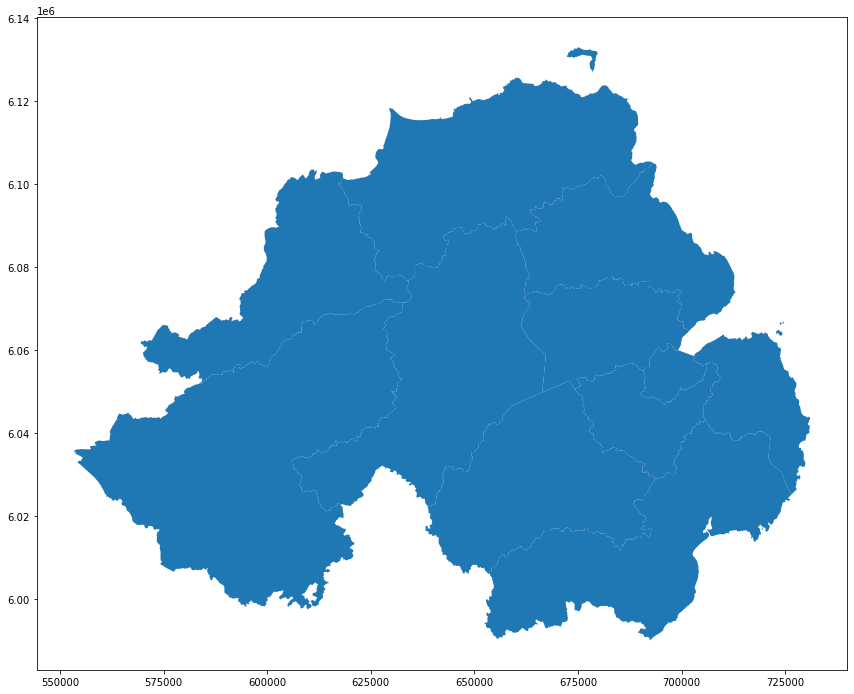

In [49]:
districts_32629.plot(figsize=(20,12))